# Final Project

## Chaotic Motion of the Duffing Oscillator

Let's examine the realistic effects of a short spring system limited in its stretching length. For example, a spring made of several windings at most would stretch to the unwound length of the spring (assuming the wire itself does not stretch). One could expect some non-linearity between the force applied to the spring and the stretch of the spring. The spring constant, instead of being constant as in a simple harmonic oscillator, could have a quadratic dependence.  That is, $k$ would be proportional to $x^2$ giving the nonlinear equation:

$$
\frac{d^2 x}{dt^2} + A x^3 =0.
$$

A realistic system will also have a frictional term proportional to the velocity. To overcome losses due to friction, and to make the system more interesting at large time values, let us have the system periodically driven. The resulting equation of motion is given below:

$$
\frac{d^2 x}{dt^2} + \alpha \frac{dx}{dt} + A x^3 = -F\cos(\Omega_d t).
$$

This equation describes what is known as Duffing's oscillator, and it is known to exhibit a wide
variety of behavious. $A$, $F$, $\alpha$ and $\Omega_d$ are adjustable parameters. For this study, we set $A=1$ and $\Omega_d = 1$.

**Part (a)** I wrote a program to solve the second-order differential equation written above using the fourth-order Runge–Kutta method. I start by plotting the position $x$ versus time $t$ for 25 periods of the driving force (the period is equal to $2\pi/\Omega_d$). Then, I plot the phase space (i.e. $dx/dt$ versus $x$). The initial values at $t=0$ are $x_0 =3$ and $dx/dt=0$. In this part parameters $(F, \alpha) = (7, 5)$. This illustrates the transition to steady state harmonic motion.

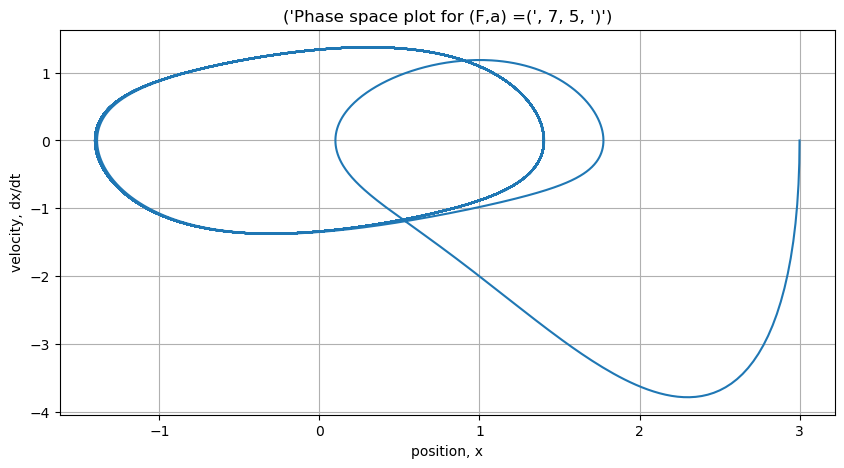

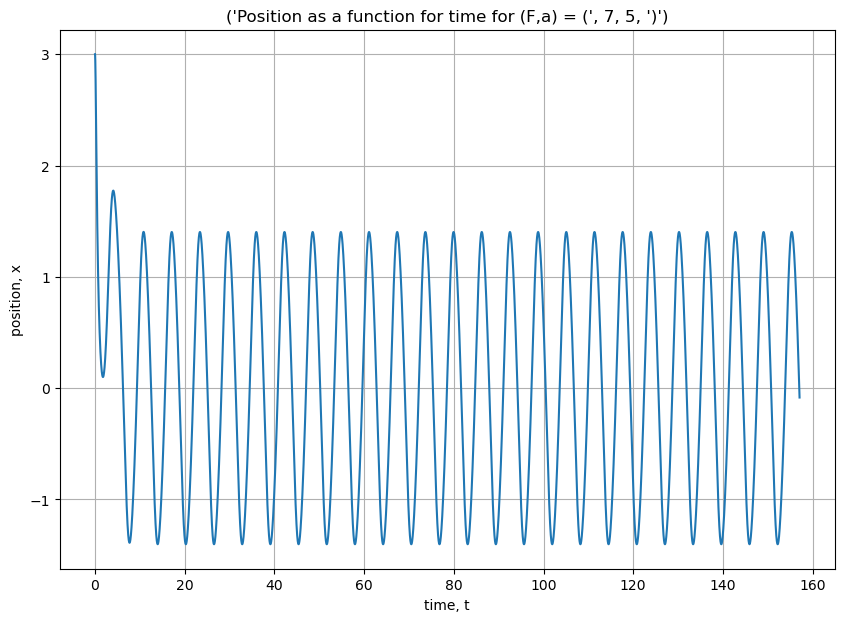

In [ ]:
# Start by importing the neccesary libraries
from numpy import cos, sin, pi, linspace, array, empty, log, float64
from matplotlib.pyplot import plot, show, grid, legend, title, xlabel, ylabel, figure
from scipy.integrate import solve_ivp, odeint
from math import pi as pie

#A)

# Solving the DE

# Steal from lectures with adjustments
def RK4(f, ti, tf, h, yinit):
    """This program implements the forth order Runge-Kutta method 
       for solving an initial value problem for a system of n 
       ordinary differential equations.
       """   
    Nsteps = int((tf - ti)/h) # number of steps
    t = linspace(ti, tf, Nsteps + 1) # grid for the independent variable   
    
    y = empty([len(yinit), len(t)]) # (n, Nstep) array for 
                                    # the dependent variable.
    ys = array(yinit) # ys is a n-dim buffer array. 
                      # Set it to the initial conditions array.

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
    return t, y

# Define a class for the Duffing Oscillator
class Duffing:
    # This is the main class that will have methods for the differential equation as well as ploting it
    def __init__(self, F, a, tf):
        self.F = F
        self.a = a
        self.tf = tf

    def DE(self, t, X):
        # This function is used to be compatible with RK4, and also has the differential equation as defined
        x, dx = X
        Osc = -self.F*cos(1.0*t) - self.a*dx - 1.0*x**3
        return array([dx, Osc])
    
    def phaseSpace(self):
        # This will plot a phase space plot using RK4
        duffy = RK4(self.DE, 0.0, self.tf, 0.01, [x_0, dx_0])
        figure(figsize=(10, 5))
        grid()
        # Please excuse the formating for the title, I wasn't sure how else to implement
        # If I used commas inside the title method, it interpreted it as other parameters
        txt = ('Phase space plot for (F,a) =(', self.F, self.a, ')')
        title(txt)
        xlabel("position, x")
        ylabel("velocity, dx/dt")
        plot(duffy[1][0], duffy[1][1])
    
    def xNT(self):
        # This will plot a position vs time graph
        duffy = RK4(self.DE, 0.0, self.tf, 0.01, [x_0, dx_0])
        figure(figsize=(10, 7))
        grid()
        # Please excuse the formating for the title, I wasn't sure how else to implement
        # If I used commas inside the title method, it interpreted it as other parameters
        txt = ('Position as a function for time for (F,a) = (', self.F, self.a, ')')
        title(txt)
        xlabel("time, t")
        ylabel("position, x")
        plot(duffy[0], duffy[1][0])
    
    def rk4(self, x, dx):
        # This is used for part c, it basically returns duffy 
        # with modified initial conditions
        return(RK4(self.DE, 0.0, self.tf, 0.01, [x, dx]))
        
        

# Using our class to solve the DE and plot in phase space
A = Duffing(7, 5, 25*2*pi)
A.phaseSpace()
A.xNT()

**Part (b)** Plotted the system for choices of the following parameters $(F, \alpha) = (7,0.5), (10, 0.05)$, and $(10, 0.01)$. For each set of parameters, there is a position vs time and phase space plot. Here as well, I integrate the ODE for $25$ periods of the driving force. The initial values at $t=0$ are $x_0 =3$ and $dx/dt=0$. Followed by discussion of any solutions which are clearly not a steady motion.

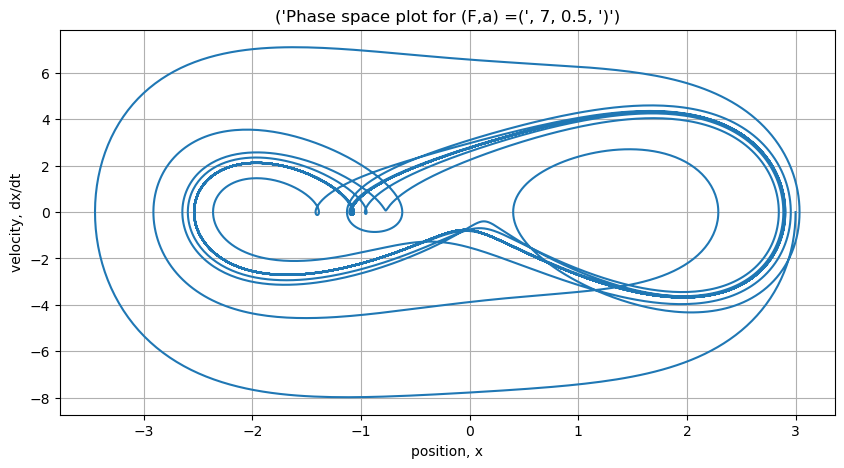

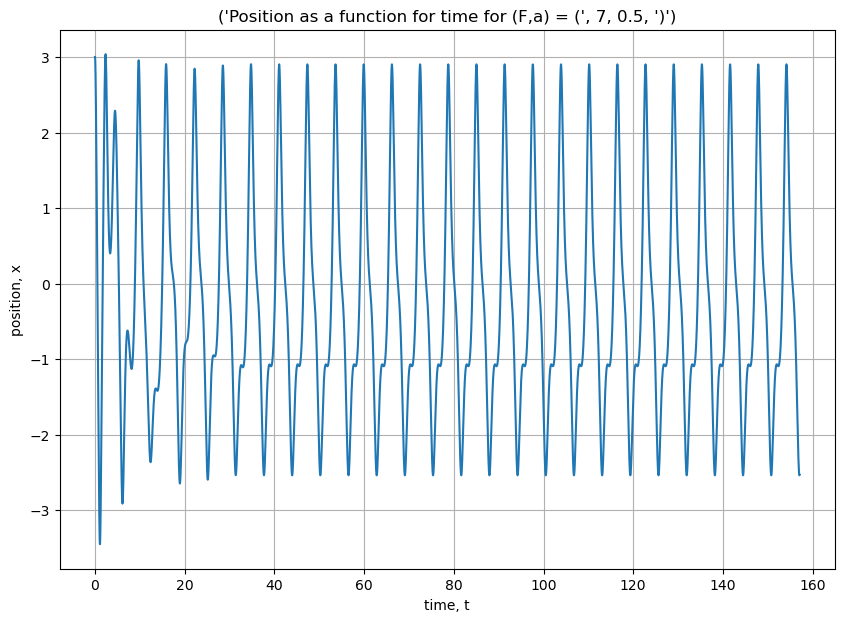

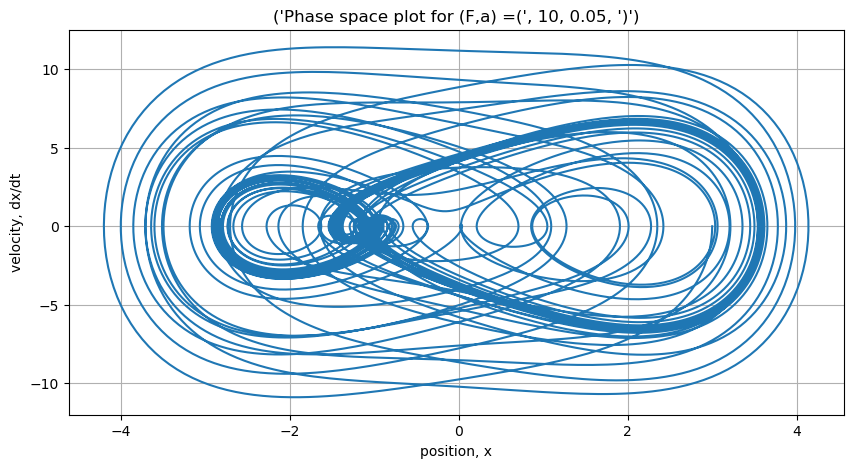

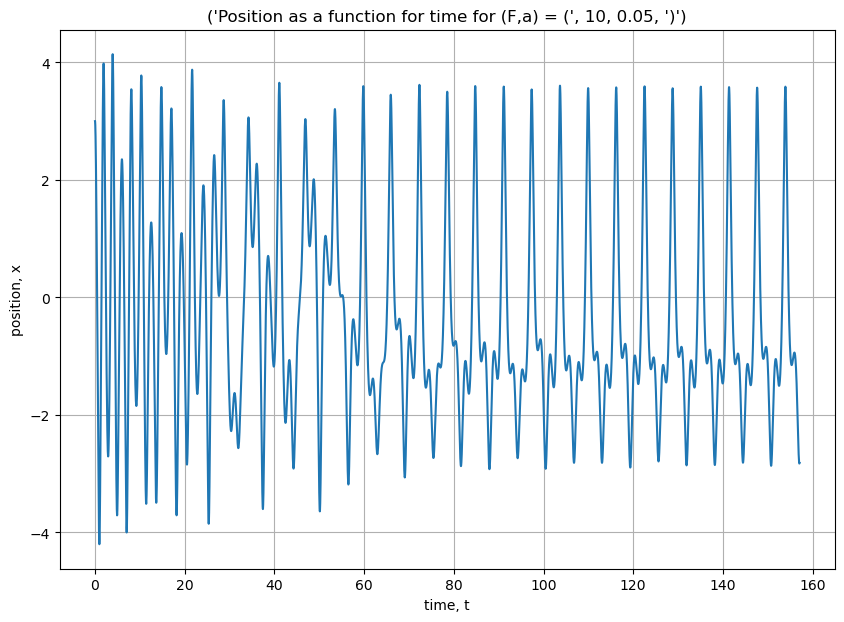

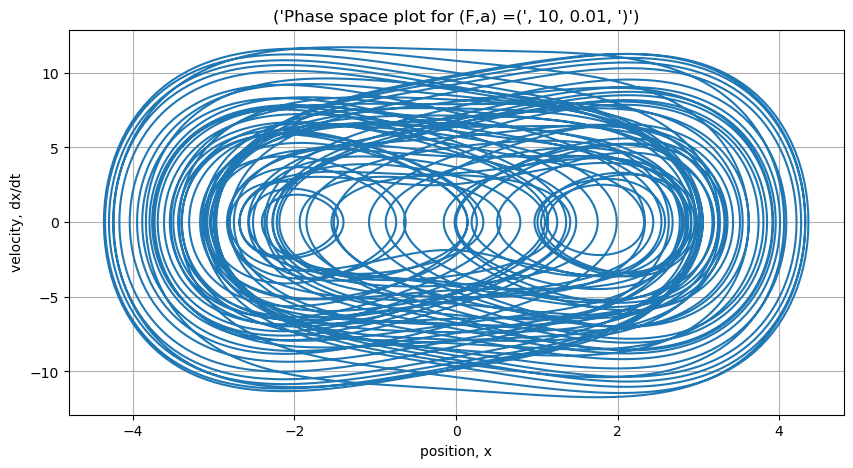

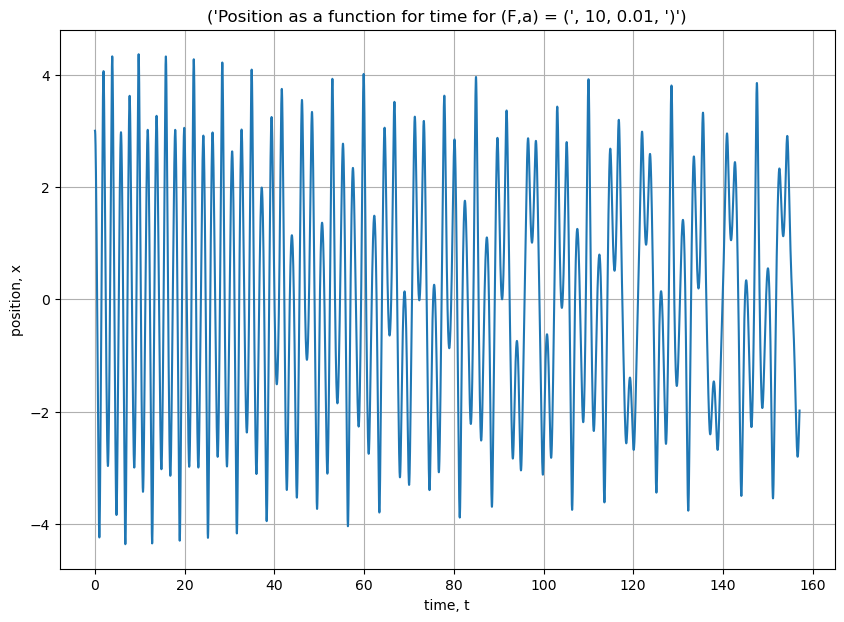

In [125]:
# your code is here

# B)
# Use the class defined in the A) and create the plots!


# (F,a) = (7, 0.5)
b1 = Duffing(7, 0.5, 25*2*pi)
b1.phaseSpace()
b1.xNT()
# Despite some initial chaos, the position vs time plot settles into a fairly uniform
# pattern, so this case does have steady motion

# (F,a) = (10.0, 0.05)
b2 = Duffing(10, 0.05, 25*2*pi)
b2.phaseSpace()
b2.xNT()
# This doesn't appear to be a steady motion as the position vs time plot
# exhibits chaotic behavior


# (F,a) = (10.0, 0.01)
b3 = Duffing(10, 0.01, 25*2*pi)
b3.phaseSpace()
b3.xNT()
# This doesn't appear to be a steady motion as the position vs time plot
# exhibits chaotic behavior

## Overall, b1 is the only case with steady motion, as the position vs time graph settles into a fairly uniform pattern.

## b2, b3 are not steady motion, as the position vs time graph exhibits choatic behavior.

**Part (c)**. To study this system further, consider the stability of the solution with respect to the initial conditions. So far all of the solutions started from the initial conditions $x_0 =3$, $dx/dt=0$ at $t=0$. 

To do this, I solve the differential equation for $(F, \alpha) = (7, 5)$ up to the final moment of time equal to $10\pi$ for two initial conditions $x_0 =3$, $dx/dt=0$, and  $x_0 =3.001$, $dx/dt=0$. I plot the logarithm of the absolute values of the difference of two solutions for times between $4\pi$ and $10\pi$ only. I then do the same for $(F, \alpha) = (10, 0.01)$.

3142


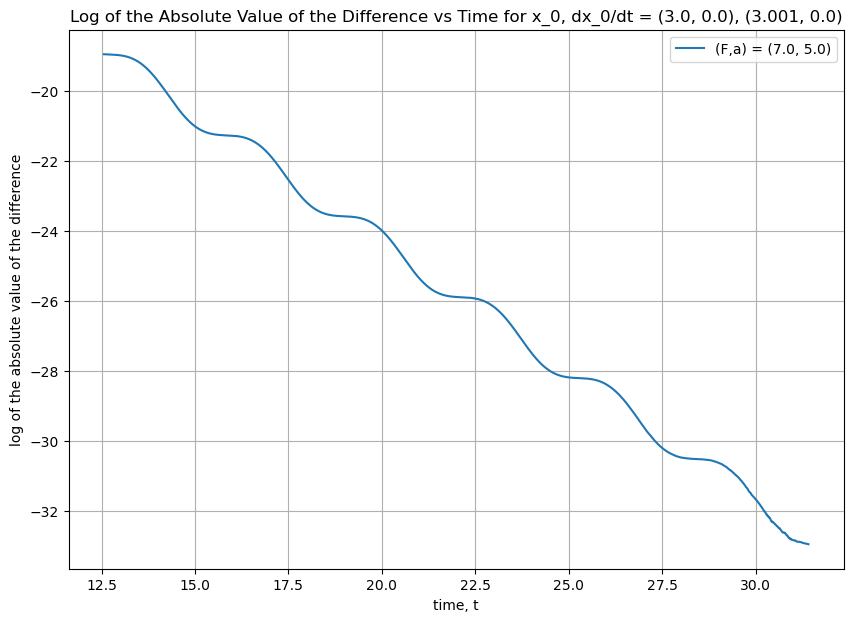

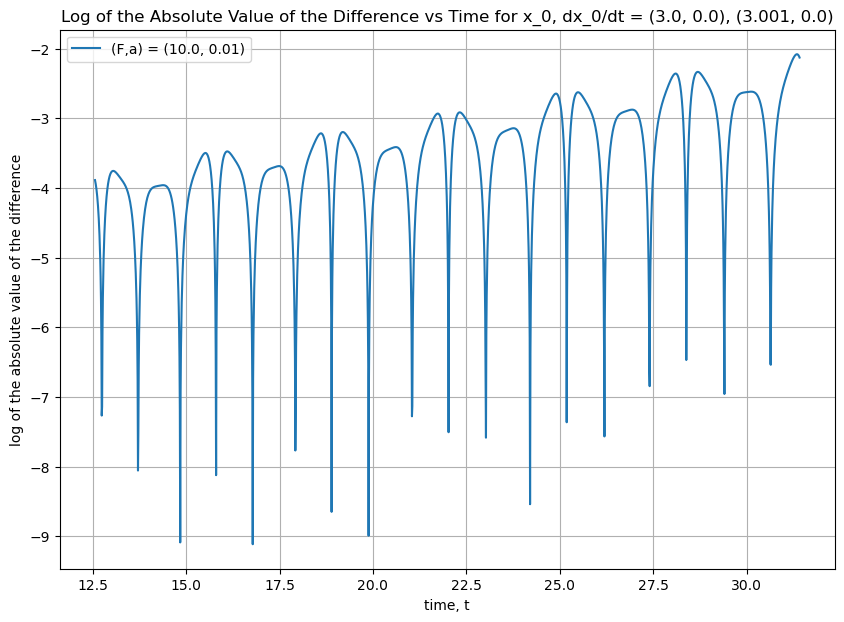

In [124]:
# your code is here

# C)

# Use the Duffing class defined in A)
c1 = Duffing(7.0, 5.0, 10*pi)
c2 = Duffing(7.0, 5.0, 10*pi)

# Use the defined rk4 method to obtain the solution for splicing/manipulation
C1 = c1.rk4(3.0, 0.0)
C2 = c2.rk4(3.001, 0.0)

# Set up the log of the absolute value of the difference for the plot
logc12 = log(abs(C1[1][0] - C2[1][0]))

# Set up the time axis
t = C1[0]
# Print out the length to use for splicing
print(len(t))


# Make a nice plot
figure(figsize=(10, 7))
title("Log of the Absolute Value of the Difference vs Time for x_0, dx_0/dt = (3.0, 0.0), (3.001, 0.0)")
xlabel("time, t")
ylabel("log of the absolute value of the difference")
# Use 314, as the len is 3142
plot(t[4*314:len(logc12)], logc12[4*314:len(logc12)], label = "(F,a) = (7.0, 5.0)")
legend()
grid()
show()

c3 = Duffing(10, 0.01, 10*pi)
c4 = Duffing(10, 0.01, 10*pi)

C3 = c3.rk4(3.0, 0.0)
C4 = c4.rk4(3.001, 0.0)

logc34 = log(abs(C3[1][0] - C4[1][0]))

figure(figsize=(10, 7))
title("Log of the Absolute Value of the Difference vs Time for x_0, dx_0/dt = (3.0, 0.0), (3.001, 0.0)")
xlabel("time, t")
ylabel("log of the absolute value of the difference")
# Again use 314 as the len is 3142 
plot(t[4*314:len(logc34)], logc34[4*314:len(logc34)], label = "(F,a) = (10.0, 0.01)")
legend()
grid()
show()

**Part (d)** We have two plots for $(F, \alpha) = (7, 5)$ and $(F, \alpha) = (10, 0.01)$. Time varies from $4\pi$ to $10\pi$ on both plots. Focusing on the values and locations of the *local maxima*, It is reasonable to assume that each of these maxima is located somewhere in a segment between $[(4+i)\pi, (5+i)\pi]$, where $i=0,1,2,3,4,5$. 

Breaking the total time segment from $4\pi$ to $10\pi$ into six equal parts, I determined the locations of each maximum and the corresponding values at them, starting with $(F, \alpha) = (7, 5)$. I generate two arrays each containing six elements, one array for time values of the local maxima, and the other for the actual maxima values.  Then I plot this.

Doing the same for $(F, \alpha) = (10, 0.01)$, we see that the locations of the maxima are approximately (but almost) equidistant in this case.

Since both dependences (representing the maxima of the logarithms of the absolute values of the differences as functions of time) are linear:

$$
\log(|\Delta x|_{max}) = C+\lambda t.
$$

$\lambda$ is called the Lyapunov exponent. For non-chaotic regime $\lambda <0$, while for the chaotic one $\lambda >0$. The transition to chaos occurs when $\lambda =0$. In the chaotic regime, 
the difference between the solutions for very close initial conditions exponentially grows with time at small enough $t$.

Here, I determine the Lyapunov exponents for $(F, \alpha) = (7, 5)$ and  $(F, \alpha) = (10, 0.01)$.

3142
1884
3142
3142
1884
1884
6


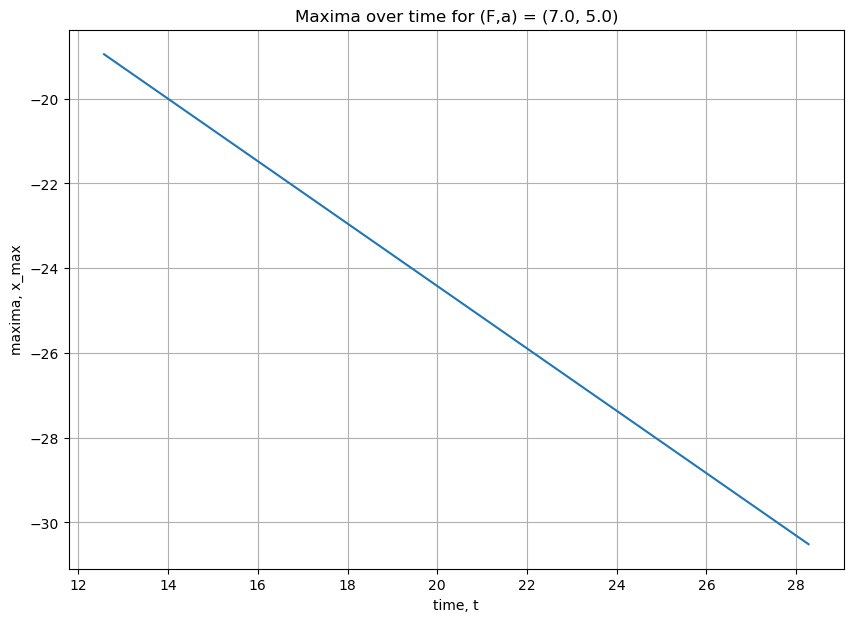

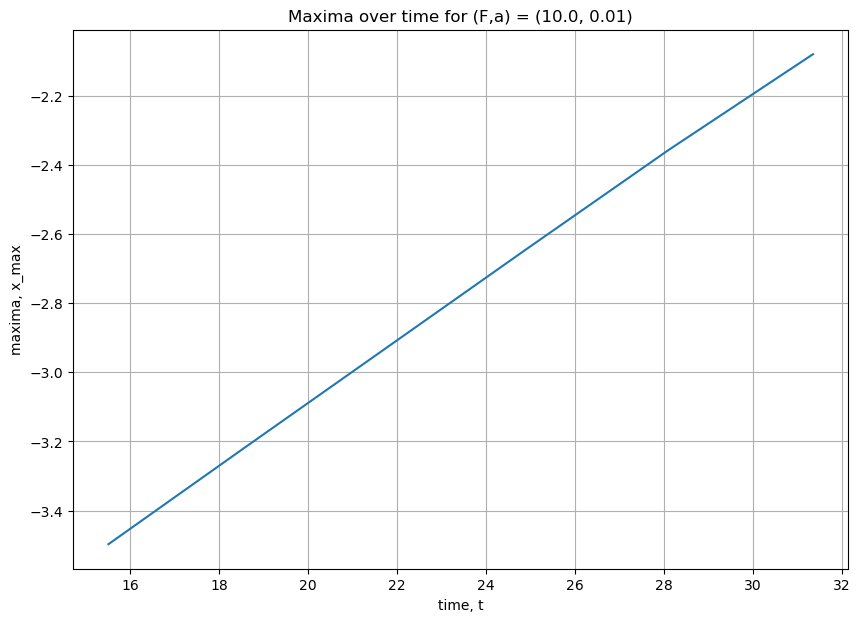

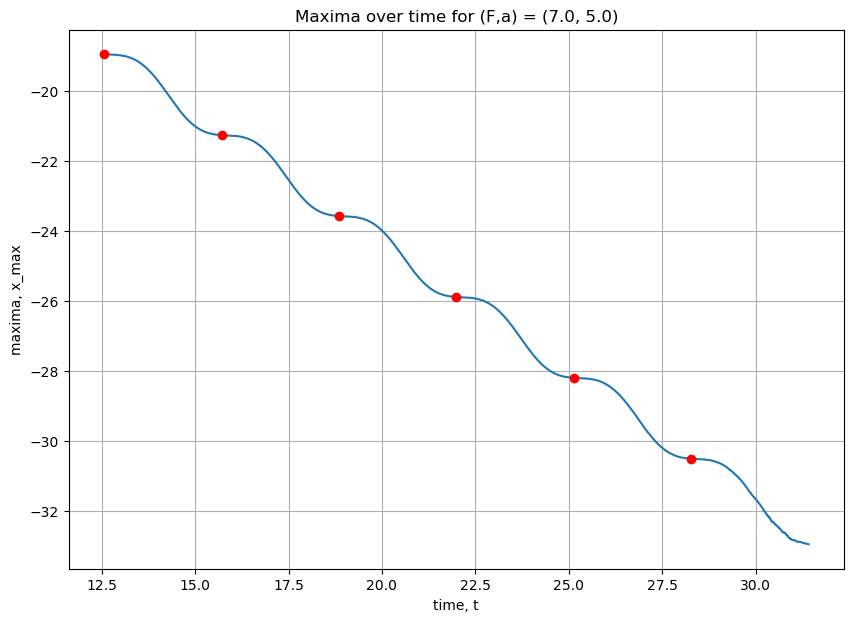

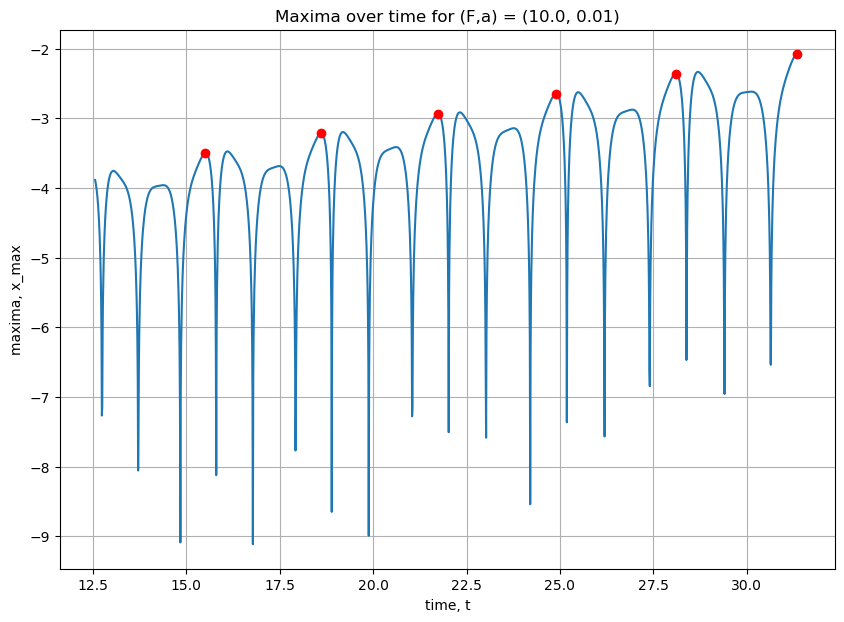

The Lyapunov exponent for initial conditions of (F,a) = (7.0, 5.0) is:
 -0.7364723009603452
The Lyapunov exponent for initial conditions of (F,a) = (10.0, 0.01) is:
 0.08954914621860814


In [123]:
print(len(t))
# This time array has a length of 3142
# Take a point off of each end so that its divisible by 314
td = t[1 + (4*314):len(t)-1]
print(len(t2))
# The length of t2 is 1884, which = 6 when divided by 314

# Now do the same for logc12, logc34 from part c)
print(len(logc12))
print(len(logc34))
logc12d = logc12[1 + (4*314):len(t)-1]
logc34d = logc34[1 + (4*314):len(t)-1]
print(len(logc12d))
print(len(logc34d))

# Now, we have 3 arrays with the proper sizes (they can divided into 6 equal parts)

def maxFinder():
    # These lists will hold the maximum values
    Maxd1 = []
    tMaxd1 = []
    Maxd2 = []
    tMaxd2 = []
    
    # These variables will hold the maximum value and append it to the lists above
    d1max = 0
    td1max = 0
    d2max = 0
    td2max = 0

    # This loop will find the maximum points
    for i in range(6):
        td2 = td[(i)*314:(i+1)*314]
        logc12d2 = logc12d[(i)*314:(i+1)*314]
        logc34d2 = logc34d[(i)*314:(i+1)*314]
        d1max = logc12d2[0]
        d2max = logc34d2[0]
        td1max = td2[0]
        td2max = td2[0]
        for j in range(len(td2)):
            if d1max <= logc12d2[j]:
                d1max = logc12d2[j]
                td1max = td[j + ((i)*314)]
            if d2max <= logc34d2[j]:
                d2max = logc34d2[j]
                td2max = td[j + ((i)*314)]
        Maxd1.append(d1max)
        tMaxd1.append(td1max)
        Maxd2.append(d2max)
        tMaxd2.append(td2max)
    return([Maxd1, tMaxd1, Maxd2, tMaxd2])

# We have 6 values, as required!
print(len(maxFinder()[0]))

# Now plot it nicely, two plots are used to confirm the slopes are as predicted
# (It didn't appear as nice on 1 plot)
figure(figsize=(10, 7))
plot(maxFinder()[1],maxFinder()[0])
xlabel("time, t")
ylabel("maxima, x_max")
title("Maxima over time for (F,a) = (7.0, 5.0)")
grid()
show()


figure(figsize=(10, 7))
plot(maxFinder()[3],maxFinder()[2])
xlabel("time, t")
ylabel("maxima, x_max")
title("Maxima over time for (F,a) = (10.0, 0.01)")
grid()
show()

# Now plot the maxima as red points on the plots from c), to prove that we are right
figure(figsize=(10, 7))
plot(t[4*314:len(logc12)], logc12[4*314:len(logc12)])
plot(maxFinder()[1],maxFinder()[0], 'ro')
xlabel("time, t")
ylabel("maxima, x_max")
title("Maxima over time for (F,a) = (7.0, 5.0)")
grid()
show()

figure(figsize=(10, 7))
plot(t[4*314:len(logc34)], logc34[4*314:len(logc34)])
plot(maxFinder()[3],maxFinder()[2], 'ro')
xlabel("time, t")
ylabel("maxima, x_max")
title("Maxima over time for (F,a) = (10.0, 0.01)")
grid()
show()


# Now to determine the Lyapunov exponents
# Notice that the equation given resembles y = mx + b
# Find the Lyapunov exponent using the first and last point of each line 
# (y2 - y1)/(x2 - x1)

Lyapunovd1 = (maxFinder()[0][5] - maxFinder()[0][0])/(maxFinder()[1][5] - maxFinder()[1][0])
Lyapunovd2 = (maxFinder()[2][5] - maxFinder()[2][0])/(maxFinder()[3][5] - maxFinder()[3][0])
print("The Lyapunov exponent for initial conditions of (F,a) = (7.0, 5.0) is:\n", Lyapunovd1)
print("The Lyapunov exponent for initial conditions of (F,a) = (10.0, 0.01) is:\n", Lyapunovd2)

**Part (e)** A measurement of the divergence is attained with the use of a technique known as the Poincare section, which are phase space plots that only include points with time value of $2\pi n$. To generate a Poincare section, the phase space has to look like it did at the same phase angle $(\Omega_d t +\varphi)$, which for our system is the time corresponding to a multiple of $2\pi$ ($\Omega_d = 1$) plus an arbitrary phase.

I created a Poincare section for the parameters $(F,\alpha) = (10, 0.01)$ at $2\pi n$, $n>=10$. The initial conditions at $t=0$, are $x_0 =3$ and $dx/dt=0$.  I set the number of periods equal to $1000$, so that the final time is equal to $1000\cdot (2\pi)$, for better visibility.   

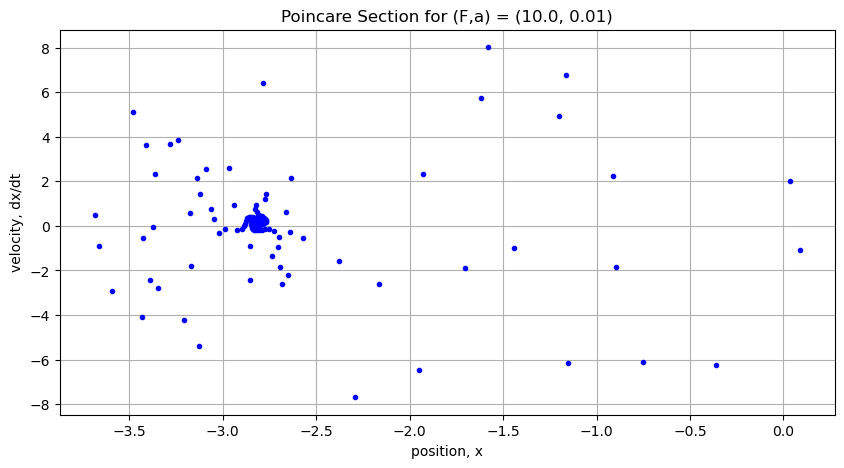

In [ ]:
# your code is here

# Again, steal from lecture with a slight modification
def RK4E(f, ti, tf, h, yinit):
    """This program implements the forth order Runge-Kutta method 
       for solving an initial value problem for a system of n 
       ordinary differential equations.
       """   
    Nsteps = int((tf - ti)/(h)) # number of steps
    t = linspace(ti, tf, Nsteps + 1) # grid for the independent variable   
    
    y = empty([len(yinit), len(t)]) # (n, Nstep) array for 
                                    # the dependent variable.
    ys = array(yinit).astype(float64) # ys is a n-dim buffer array. 
                      # Set it to the initial conditions array.
        
    poincarePts = [] # Use this list to keep track of which points to plot for this
                     # Poincare section

    for i, ts in enumerate(t): # RK4 integrator
        y[:,i] = ys
        k1 = h*f(ts, ys)
        k2 = h*f(ts +0.5*h, ys +0.5*k1)
        k3 = h*f(ts +0.5*h, ys +0.5*k2)
        k4 = h*f(ts +h, ys +k3)
        ys += (k1+ 2*k2+ 2*k3 +k4)/6
        if i % 360 == 0:
            poincarePts.append(y[:,i])
    return t, array(poincarePts[10:]).T

# With this modification, we modify the Duffing class from earlier 
# to have RK4E instead of RK4, and leave out the other functions

# Define a class for the Duffing Oscillator
class Duffing2:
    # This is the main class that will have methods for solving the differential equation
    # as well as ploting the Poincare Section
    def __init__(self, F, a, tf):
        self.F = F
        self.a = a
        self.tf = tf

    def DE(self, t, X):
        # This function is used to be compatible with RK4 as per lecture
        # Also has the differential equation as defined
        x, dx = X
        # The order of the calculation seems to impact the pattern
        # Notice that this is different from the order in Duffing from A)
        Osc =  -self.a*dx -1.0*x**3 -self.F*cos(1.0*t)
        return array([dx, Osc])
    
    def phaseSpace(self):
        # This will plot a phase space plot using the RK4E modification
        duffy = RK4E(self.DE, 0.0, self.tf, (pi/180), [3.0, 0.0])
        figure(figsize=(10, 5))
        grid()
        title("Poincare Section for (F,a) = (10.0, 0.01)")
        xlabel("position, x")
        ylabel("velocity, dx/dt")
        plot(duffy[1][0][:], duffy[1][1][:], 'bo', markersize = 3)


E = Duffing2(10.0, 0.01, 1000*2*pi)
E.phaseSpace()

**Part (f)** Repeating the calcualtions of part (a) and solving the second-order differential equation using the fourth-order Runge–Kutta method with step $h=0.01$ for $(F, \alpha) = (7, 5)$. Again the initial values at $t=0$ are $x_0 =3$ and $dx/dt=0$, but the final moment of time is set to $40\pi$. I calculated the discrete Fourier transform of displacement $x(t)$ and plotted the magnitudes of the first $200$ coefficients.

Then, did the same for $(F, \alpha) = (10, 0.01)$.

Followed by brief comments on the results.

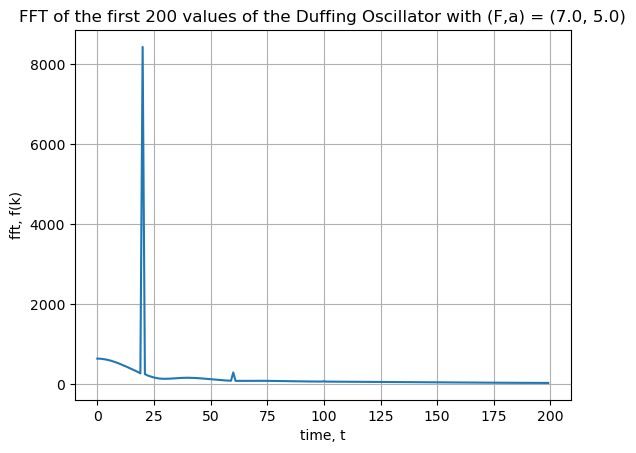

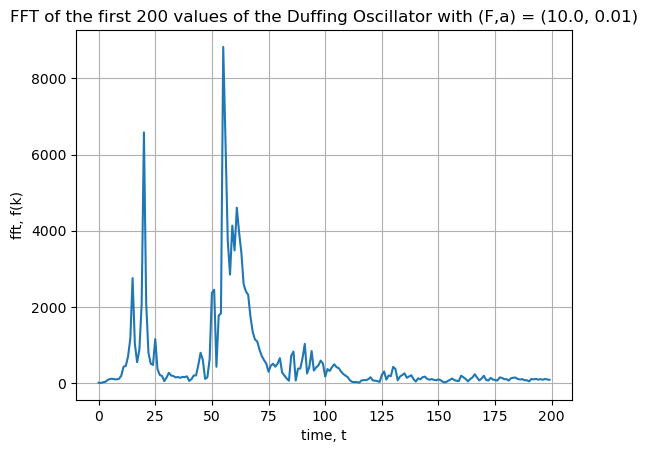

In [ ]:
# your code is here
from numpy.fft import rfft, irfft

# Recall the original Duffing class from A) and use it

f = Duffing(7.0, 5.0, 40*pi)
a = f.rk4(3.0, 0.0)
a2 = a[1][0]

# Proceed as in lecture
k = []
for i in range(len(a2)):
    k.append(i)
# This will ensure that the plot can be made (by providing another axis)
# and also making sure its the same length, and incrementing to count k
a3 = abs(rfft(a2))

title("FFT of the first 200 values of the Duffing Oscillator with (F,a) = (7.0, 5.0)")
plot(k[0:200], a3[0:200])
ylabel("fft, f(k)")
xlabel("time, t")
grid()
show()


f2 = Duffing(10.0, 0.01, 40*pi)
b = f2.rk4(3.0, 0.0)
b2 = b[1][0]

# Do the same thing as above
k2 = []
for i in range(len(b2)):
    k2.append(i)

b3 =  abs(rfft(b2))

title("FFT of the first 200 values of the Duffing Oscillator with (F,a) = (10.0, 0.01)")
plot(k2[0:200], b3[0:200])
ylabel("fft, f(k)")
xlabel("time, t")
grid()
show()

## Look at the plots, and briefly comment on the results in a markdown cell.

## Well, the first plot has a very clear peak frequency. This says to me that its not a very chaotic system, and the plot of the log of the absolute value of the difference from part C) agrees with this. (Not a very chaotic system when (F,a) = (7,5), as slightly perturbing the ICs does not result in many discontinuities or chaos). 

## The second plot has many large peaks, and instead of it being contained to 2 specific values of t, its a lot more spread out too. This indicate a chaotic system. The plot from part C) agrees with this because even slightly perturbing the ICs results in many discontinuities and chaotic behavior.

## All in all, this conveys that having a large difference between the force, F, and the stiffness of the spring, alpha, results in highly chaotic behavior, and this makes sense. If I give a 'wobbly' spring (low alpha) a hard push, its behavior will be very chaotic and unpredictably bouncy. Whereas a stiff spring with the same push will behave in a more predictable way. The 'wobbly' spring will behave chaotically no matter where I push it from, whereas the stiff spring will have more similar behavior despite varying where I push it from

I wanted to thank you both for a great term full of learning. This has been one of my favorite courses :) Thank you for your time and I hope that you and your loved ones are doing well!
~ Khanjan Soni